**Assignment 1 - Titanic data analysis**

* Import data from drive or somewhere else
* Basic statistics
* Graphical analysis

**Dataset description**

* survival - Survival (0 = No; 1 = Yes)
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name - Name
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* boat - Lifeboat (if survived)
* body - Body number (if did not survive and body was recovered)

In [377]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [378]:
titanic = pd.read_excel("titanic_dataset.xls")
titanic.shape

(1309, 14)

In [379]:
#Remove all rows that don't have an age
titanic = titanic.dropna(subset=['age'])
titanic.shape

(1046, 14)

In [394]:
#All passengers less than 16y will be counted as 'child'
condition = titanic['age']<16
titanic.loc[condition, 'sex'] = 'child'
titanic.shape

(1046, 14)

In [393]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",child,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",child,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [395]:
#Total Quantity
quantity_data = {
    "male": len(titanic[titanic['sex']=='male']),
    "female": len(titanic[titanic['sex']=='female']),
    "child": len(titanic[titanic['sex']=='child']),
    "first": len(titanic[titanic['pclass']==1]),
    "second": len(titanic[titanic['pclass']==2]),
    "third": len(titanic[titanic['pclass']==3]),
}
quantity_df = pd.DataFrame(quantity_data, index=[0])
quantity_df

,male,female,child,first,second,third
0,599,332,115,284,261,501


In [396]:
#Total survived
survived = titanic[titanic['survived']==1]
survived_data = {
    "male": len(survived[survived['sex']=='male']),
    "female": len(survived[survived['sex']=='female']),
    "child": len(survived[survived['sex']=='child']),
    "first": len(survived[survived['pclass']==1]),
    "second": len(survived[survived['pclass']==2]),
    "third": len(survived[survived['pclass']==3]),
}
survived_df = pd.DataFrame(survived_data, index=[0])
survived_df

,male,female,child,first,second,third
0,106,255,66,181,115,131


In [397]:
#Total not survived
not_survived = titanic[titanic['survived']==0]
not_survived_data = {
    "male": len(not_survived[not_survived['sex']=='male']),
    "female": len(not_survived[not_survived['sex']=='female']),
    "child": len(not_survived[not_survived['sex']=='child']),
    "first": len(not_survived[not_survived['pclass']==1]),
    "second": len(not_survived[not_survived['pclass']==2]),
    "third": len(not_survived[not_survived['pclass']==3]),
}
not_survived_df = pd.DataFrame(not_survived_data, index=[0])
not_survived_df

,male,female,child,first,second,third
0,493,77,49,103,146,370


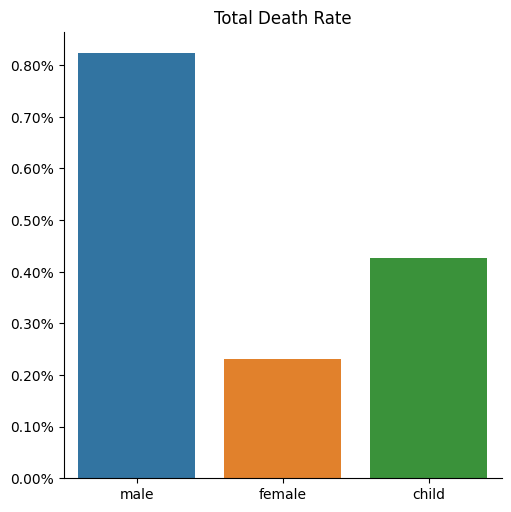

In [399]:
#Total death rate by male, female and child
res = not_survived_df/quantity_df
res[['male', 'female', 'child']]
fig = sns.catplot(data=res[['male', 'female', 'child']], kind='bar')

# Define o formato do eixo y como porcentagem para cada facet
for ax in fig.axes.flat:
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Define o título do gráfico
fig.set(title='Total Death Rate')


In [386]:
num_of_children = titanic[titanic['sex']=='child']
adults = titanic[titanic['sex']!='child']
num_of_adults_male = adults[adults['sex']=='male']
num_of_adults_female = adults[adults['sex']=='female']

print("Number of children: "+str(num_of_children.shape[0]))
print("Number of adults male: "+str(num_of_adults_male.shape[0]))
print("Number of adults female: "+str(num_of_adults_female.shape[0]))


Number of children: 115
Number of adults male: 599
Number of adults female: 332


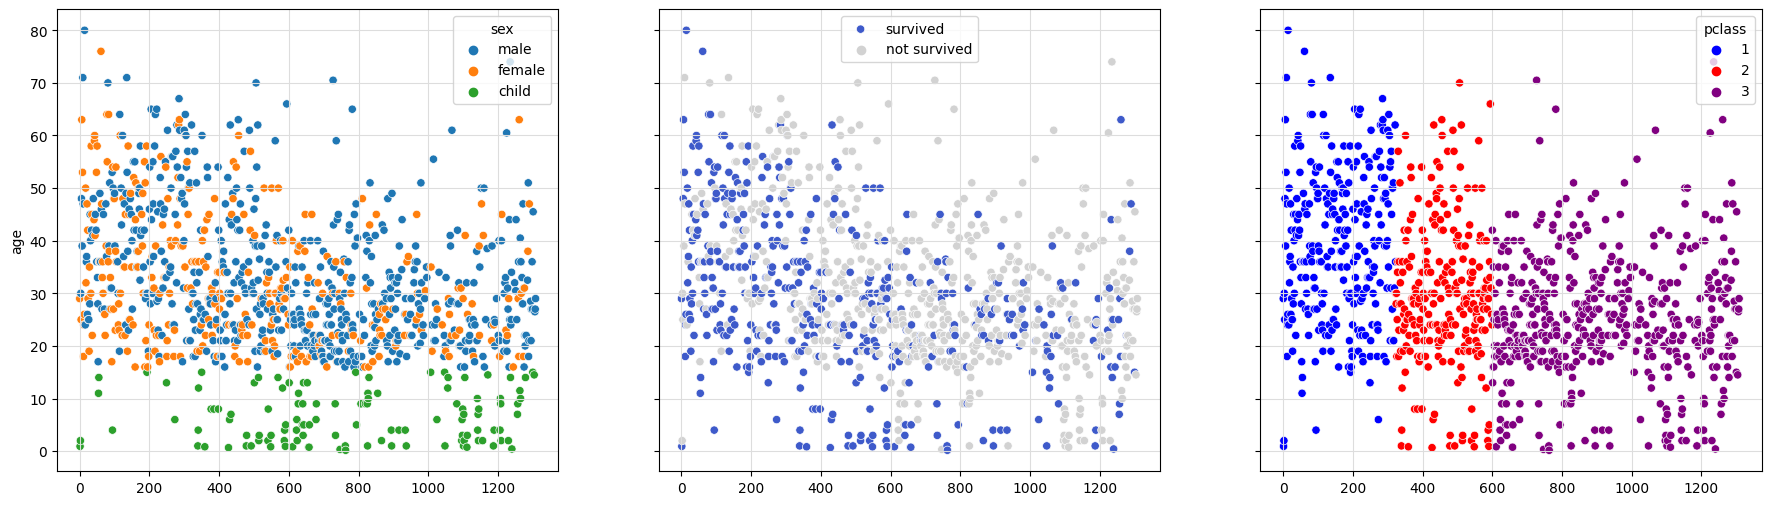

In [402]:
fig, axes = plt.subplots(1,3,sharey=True, sharex=True, figsize=(22,6))
grid_color = '#DDDDDD'
# custom_palette = ["", "#3E5ACA"]
g= sns.scatterplot(data=titanic, x=titanic.index, y='age', hue='sex', ax=axes[0])
g.grid(True, color=grid_color)

custom_palette = ["#D2D2D2", "#3E5ACA"]
g1 = sns.scatterplot(data=titanic, x=titanic.index, y='age', hue='survived', ax=axes[1], palette=custom_palette)
g1.legend(labels=['survived', 'not survived'])
g1.grid(True, color=grid_color)

custom_palette = ["blue", "red", 'purple'] 
g2 = sns.scatterplot(data=titanic, x=titanic.index, y='age', hue='pclass',  ax=axes[2], palette=custom_palette)
g2.grid(True, color=grid_color)

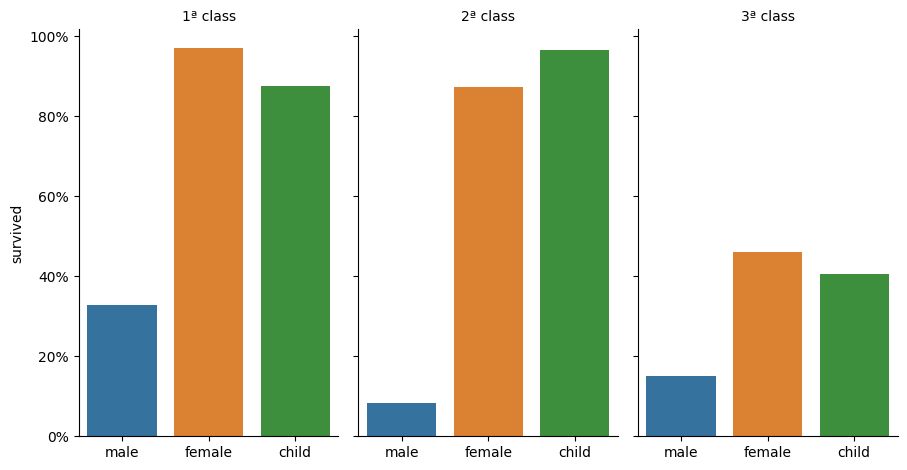

In [403]:
#Survival rate by class
new_order = ['male', 'female', 'child']
titanic['sex'] = pd.Categorical(titanic['sex'], categories=new_order, ordered=True)

g = sns.catplot(data=titanic, x='sex', y='survived', col="pclass", kind='bar', saturation=.7, errorbar=None, aspect=.6)

g.set_titles("{col_name}ª class")

for ax in g.axes.flat:
    ax.xaxis.set_label_text('')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))


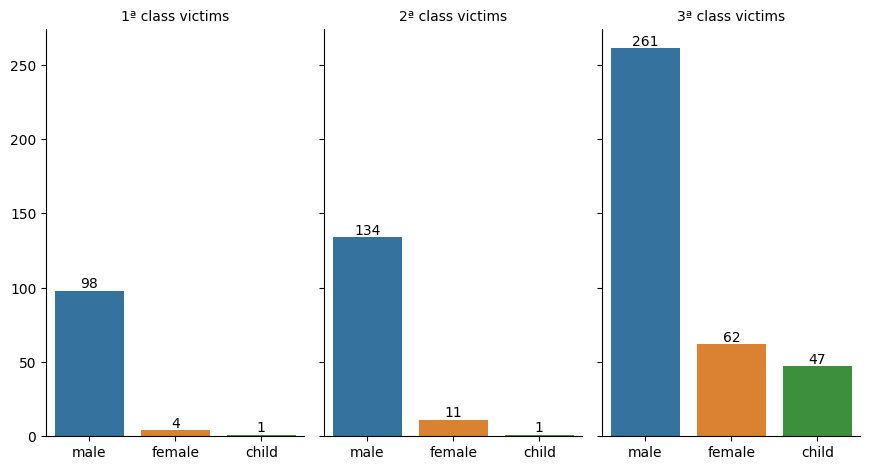

In [404]:
#Absolute number of deads by class
g = sns.catplot(data=titanic[titanic['survived']==0], x='sex', col="pclass", kind='count', saturation=.7, errorbar=None, aspect=.6)
g.set_titles("{col_name}ª class victims")
axes = g.axes

# Iterate over the axes and add the maximum value on top of each bar
for ax in axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height, int(height),
                ha='center', va='bottom', fontsize=10, color='black')

for ax in g.axes.flat:
    ax.xaxis.set_label_text('')
    ax.yaxis.set_label_text('')

Text(0.5, 1.0, 'Third Class')

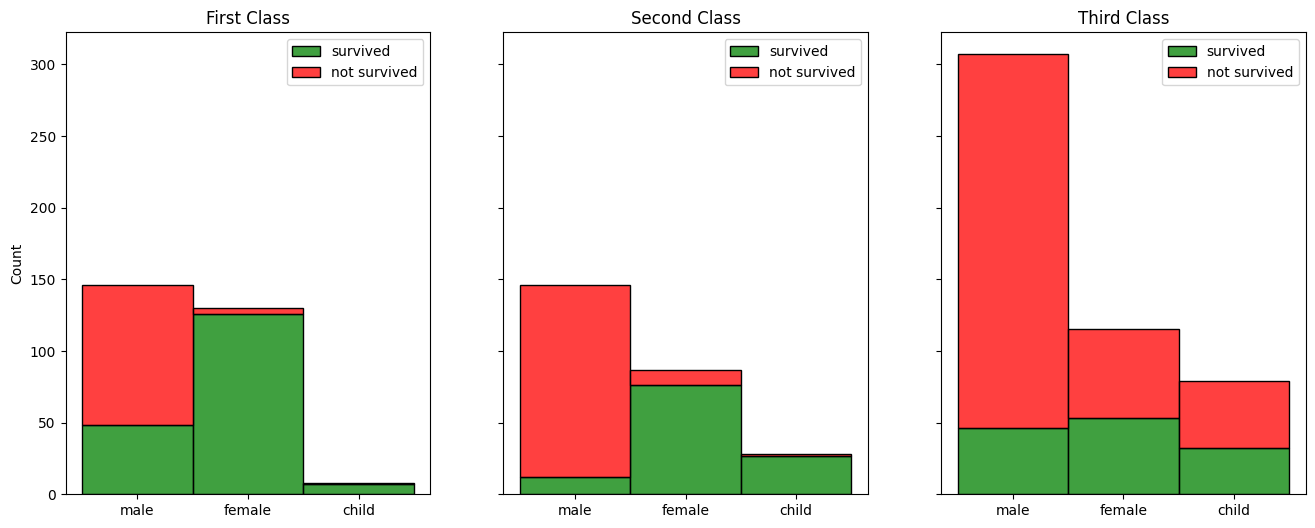

In [406]:
fig, axes = plt.subplots(1,3, figsize=(16,6), sharey=True)
custom_palette = ["red", "green"] 
order = [0, 1]
g1 = sns.histplot(data=titanic[titanic['pclass']==1], x="sex", hue='survived', hue_order=order, multiple='stack', ax=axes[0], palette=custom_palette)
g2 = sns.histplot(data=titanic[titanic['pclass']==2], x="sex", hue='survived', hue_order=order,  multiple='stack', ax=axes[1], palette=custom_palette)
g3 = sns.histplot(data=titanic[titanic['pclass']==3], x="sex", hue='survived', hue_order=order, multiple='stack', ax=axes[2], palette=custom_palette)

# Definindo o rótulo da legenda
g1.legend(labels=['survived', 'not survived'])
g2.legend(labels=['survived', 'not survived'])
g3.legend(labels=['survived', 'not survived'])

g1.set_xlabel('')
g1.set_title('First Class')
g2.set_xlabel('')
g2.set_title('Second Class')
g3.set_xlabel('')
g3.set_title('Third Class')